In [1]:
import numpy as np
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import random
#########################################################
# Description: Simulate a channel using a digital Butterworth LPF with specified cutoff. This function
#              computes the output of the channel for the given input signal, and also adds AWGN of 
#              specified noise variance
#              
# Usage: y = channel(x,T,dt,fcut,nvar,figvar)
# Inputs: x - Input signal
#         T - Symbol duration  
#         dt - Sampling interval
#         fcut - For the digital Butterworth LPF, the 3-db cutoff is set to fcut*R/(.5 * fs), where R is the
#                symbol rate   
#         nvar - noise variance
#         figvar - If '1', the function will plot the frequency response of the filter, and the 
#                 input and ouput signals
# Output: y - Output signal y = h*x + n.
#########################################################

def channel(x,T,dt,fcut,nvar,figvar):
    fs = 1/dt 
    R = 1/T 
    Wn = fcut*R/(fs/2) 
    
    if Wn == 0 : 
        y = x + np.sqrt(nvar)*np.random.normal(0,1,x.size) 
    else : 
        b, a = signal.butter(5, Wn) 
        y = signal.lfilter(b, a, x) + np.sqrt(nvar)*np.random.normal(0,1,x.size) 
    if figvar == 1 : 
        f = np.arange(0,fs/2,dt) 
        w, Hf = signal.freqz(b,a,f.size)
        fig1 = plt.figure()
        plt.plot(f,np.abs(Hf),'r-')
        fig2 = plt.figure()
        plt.plot(x,'-')
        plt.plot(y,'--')
    return y 


#To obtain NRZ-L form of given bit stream
def nrzl(ip,bit_samp,A,N):
    ip_sampled=[]
    for i in range(bit_samp):
        if ip[i]==1:
              r=[A for _ in range(N) ];
        else:
              r=[-A for _ in range(N)];
        ip_sampled.append(r);
    NRZL=np.reshape(ip_sampled,[1,bit_samp*N]);
    return NRZL[0];


#Generating AWGN noise
def AWGN_noise(variance,length):     
    std_dev=np.sqrt(variance);
    ar=[];
    ar=np.random.randn(1,length)*std_dev;
    return ar;


#Matched Filter
def passing_through_filter(x,bit_samp,A,N):               
    result=[];
    for i in range(0,bit_samp):
        y=0;
        for j in range(0,N):
            idx=i*N+j;
            y+=A*x[idx];
        if(y>=0):
            result.append(1);
        else:
            result.append(0);

    return result;

The symbols used have the same meaning as given above the channel function

## **Q 1**

Input:  [1, 0, 0, 0, 1, 0, 1]
NRZL:  [ 10  10  10  10  10  10  10  10  10  10 -10 -10 -10 -10 -10 -10 -10 -10
 -10 -10 -10 -10 -10 -10 -10 -10 -10 -10 -10 -10 -10 -10 -10 -10 -10 -10
 -10 -10 -10 -10  10  10  10  10  10  10  10  10  10  10 -10 -10 -10 -10
 -10 -10 -10 -10 -10 -10  10  10  10  10  10  10  10  10  10  10]


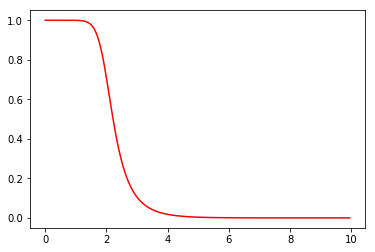

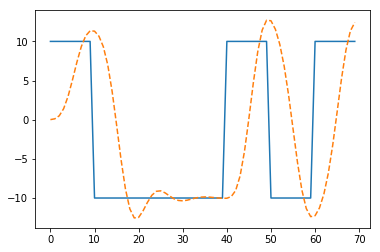

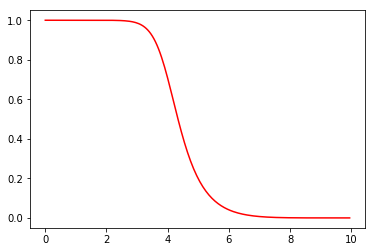

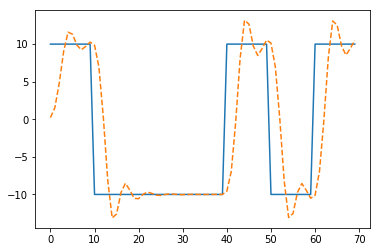

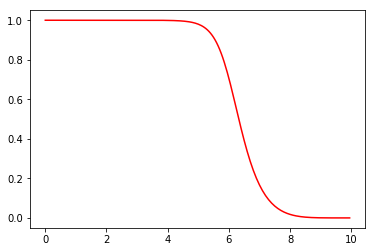

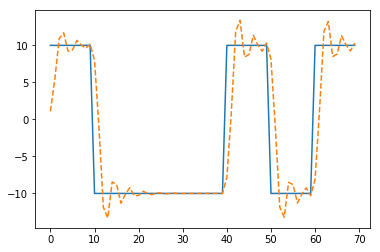

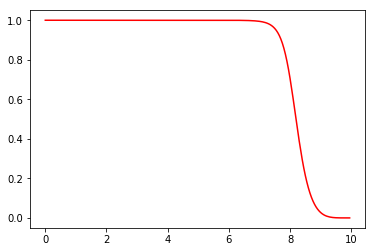

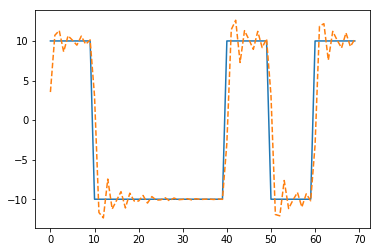

In [2]:
n=7 #number of bits
A=10 # amplitude
N=10 #number of samples per symbol
ip=[1,0,0,0,1,0,1]
print('Input: ',ip)
ip_NRZL=nrzl(ip,n,A,N);
print('NRZL: ',ip_NRZL)
T = 0.5 
dt = 0.05
nvar = 0
figvar=1
for i in range(1,5):
    fcut=i;
    y = channel(ip_NRZL,T,dt,fcut,nvar,figvar)

## **Q 2**

Average Error when fcut is  0.2  : 0.5056666666666667
Average Error when fcut is  0.4  : 0.468
Average Error when fcut is  0.6  : 0.5053333333333333
Average Error when fcut is  0.8  : 0.5053333333333333
Average Error when fcut is  1.0  : 0.5053333333333333
Average Error when fcut is  1.2  : 0.0
Average Error when fcut is  1.4  : 0.0
Average Error when fcut is  1.6  : 0.0
Average Error when fcut is  1.8  : 0.0


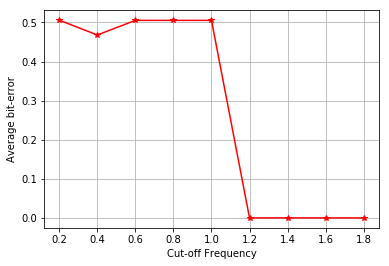

In [3]:
B=3000;
ip2=[random.randint(0,1) for _ in range(B)];
ip2_nrzl=nrzl(ip2,B,A,N);
T = 0.5
dt = 0.05
nvar = 0
figvar=0
ff=[i*0.2 for i in range(1,10)]
avg_bit_error_2=[];
for fcut in ff:
    y = channel(ip2_nrzl,T,dt,fcut,nvar,figvar)
    op=passing_through_filter(y,B,A,N)
    temp=np.sum(np.abs(np.array(op)-np.array(ip2)))/len(ip2);
    print('Average Error when fcut is ',round(fcut,3),' :',temp)
    avg_bit_error_2.append(temp);

plt.plot(ff,avg_bit_error_2,'r-*');
plt.xlabel('Cut-off Frequency');
plt.ylabel('Average bit-error');
plt.grid();

### **Q 3**

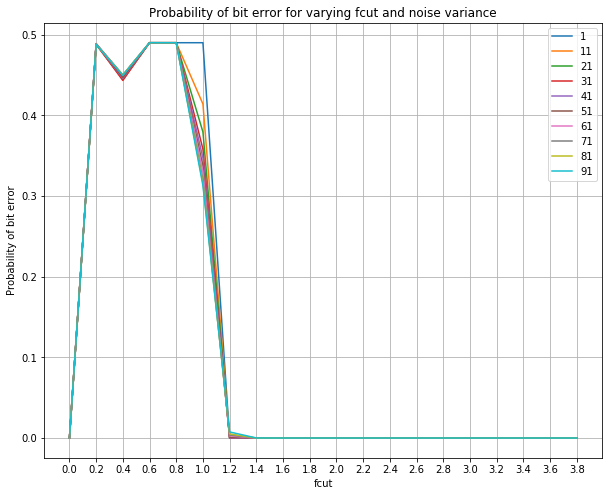

In [4]:
T = 0.5
dt = 0.05
M=40;
N=10;
B=3000;
#Taking multiple values of noise variance
nvar = [i for i in range(1,100,10)];

#Taking multiple values of cut-off frequency
fcut=[i*0.1 for i in range(0,M,2)];

avg_bit_error=[[] for _ in range(N)];
figvar=0
ip3=[random.randint(0,1) for _ in range(B)];
ip3_nrzl=nrzl(ip3,B,A,N);
#For each value of noise variance finding bit error probability for varying cut-off frequency
for nvr in range(len(nvar)):
  #print();
  #print('Noise variance: ',nvar[nvr]);
    for i in range(len(fcut)):
        temp=0;
        for _ in range(10):
            y = channel(ip3_nrzl,T,dt,fcut[i],nvr,figvar);
            op=passing_through_filter(y,B,A,N);
            temp+=np.sum(np.abs(np.array(op)-np.array(ip3)))/len(ip3);
        j=int((nvar[nvr]-1)/10);
        avg_bit_error[j].append(temp/10);
        #print('Average Error when fcut is ',fcut[i],' :',avg_bit_error[j][i]);

plt.figure(figsize=(10,8))
for i in range(N):
    plt.plot(fcut,avg_bit_error[i]);
plt.legend(nvar)
plt.xlabel('fcut')
plt.ylabel('Probability of bit error')
plt.title('Probability of bit error for varying fcut and noise variance')
plt.xticks(fcut);
plt.grid()


*Effect of increasing signal power*

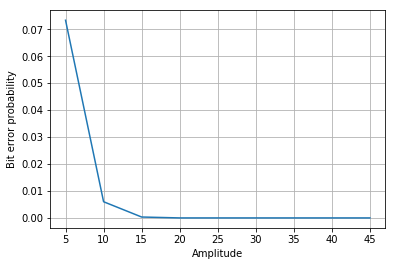

In [5]:
B=3000;#Length of bit-stream
a=[i for i in range(5,50,5)];#Values of Amplitude
temp=[];
fcut=1.2;#minimum cut-off frequency for low error
nvr=10;#Noise variance 
figvar=0;
for A in a:
    ip3=[random.randint(0,1) for _ in range(B)];
    ip3_nrzl=nrzl(ip3,B,A,N);
    y = channel(ip3_nrzl,T,dt,fcut,nvr,figvar);
    op=passing_through_filter(y,B,A,N);
    temp.append(np.sum(np.abs(np.array(op)-np.array(ip3)))/len(ip3));
plt.plot(a,temp)
plt.xlabel('Amplitude')
plt.ylabel('Bit error probability')
plt.grid()